# TP 1 Mesures de performance
Dans ce TP, nous aimerions avoir un premier aperçu sur les algorithmes d'apprentissage automatique. Plus précisément, nous aimerions évaluer leurs performances en utilisant les métriques suivantes:
- Matrice de confusion
- Rappel
- Précision
- Taux de FP
- Spécificité
- Courbe ROC

Les mesures devront être calculées sur la tâche de classification des nombres manuscrits.

Le travail consiste à implementer ces métriques et à les comparer avec les métriques des librairies disponibles.

Les algorithmes : K plus Proches Voisins devront être implementés.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler

# Lecture des fichiers de données à classifier
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
X = np.genfromtxt('data.csv', delimiter=',', dtype=int)
print(X.shape)
df = pd.read_csv("data.csv",nrows=5000)

(5000, 400)


In [3]:
# étiquettes
Y = np.genfromtxt('labels.csv', delimiter=',', dtype=int)
Y.shape

(5000,)

Afficher aléatoirement quelques données de notre base

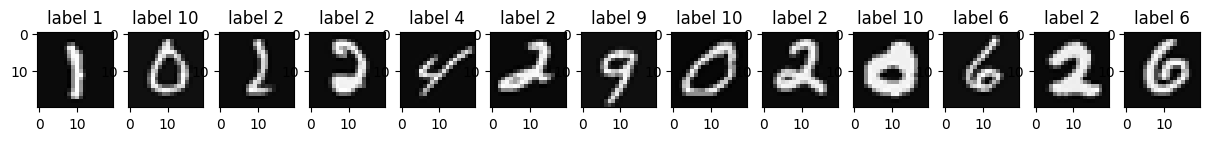

In [4]:
plt.figure(figsize=(15,8))
for i in range(13): #note: each 500 lines, there is a new value
    c = random.randint(X.shape[0]) #pick a random line from the dataset 
    a = X[c,:].reshape((20, 20)) #shape of one number in the image 
    a=np.transpose(a) # la transposé (rendre les ligne des colonne et vice versa)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(Y[c]))
    plt.imshow(a,cmap='gray')

Notons que l'étiquette 10 concerne le chiffre 0. L'étiquette a été utilisée ainsi afin de faciliter les calculs conséquents.

# Implémentation des métriques demandées
Ici il faut écrire les fonctions, puis les appeler dans la suite du code

- Matrice de confusion :

In [5]:
def Matrice_confusion(y_true, y_pred, label=None): #y_true :liste des classes vraies, y_pred :liste des classes prédites, label: liste des noms des classes
    if label is None: #pas de label en entree 
        label = sorted(set(y_true) | set(y_pred)) # utilisation d'un ensemble pour éviter les doublons
    
    n_label=len(label)
    matrice=np.full((n_label, n_label), fill_value=0, dtype=int) #creer la matrice remplie de zero 
    # Dictionnaire pour associer chaque classe à un indice
    label_to_index = {classe: i for i, classe in enumerate(label)}
    for vrai, predit in zip(y_true, y_pred):
        matrice[label_to_index[vrai], label_to_index[predit]] += 1  # Incrémentation 
    
    return matrice


- Accuracy = (TP + TN)/(TP + TN + FP + FN)

In [6]:
def Accuracy(y_true, y_pred): 
    y_true = np.array(y_true)  # Conversion en tableau NumPy
    y_pred = np.array(y_pred)
    correct = np.sum(y_true == y_pred)  # si y_true et y_pred sont de meme classe donc on incremente de 1 sinon on aura 0
    total = len(y_true)  # Nombre total d'exemples
    return correct / total

- Recall (True Positive Rate) = TP/(TP + FN)

In [7]:
def Recall(y_true, y_pred, label):
    y_true = np.array(y_true)  # Conversion en tableau NumPy
    y_pred = np.array(y_pred)
    TP = np.sum((y_true == label) & (y_pred == label)) 
    # TP = nombre d'éléments qui appartiennent à la classe (y_true == label)
    # et qui ont été bien classés par le modèle (y_pred == label)
    FN = np.sum((y_true == label) & (y_pred != label)) 
    # FN = nombre d'éléments qui appartiennent à la classe (y_true == label) 
    #et ont été mal prédits (y_pred != label)
    if TP == 0 and FN == 0:
        recall = 0 # pour eviter la division par zéro
    else:
        recall = TP / (TP + FN)
        print (f'   Recall of class {label}= {recall:.4f}' )
    return recall

def AV_Recall(y_true,y_pred):
    labels = np.unique(y_true)  # prend uniquement les classes présentes
    total=sum(Recall(y_true, y_pred, label) for label in labels) #somme des recalls de toutes les classes 
    AV_recall=total/len(labels)
    return AV_recall

- Précision = TP/(TP + FP)

In [8]:
def Precision(y_true, y_pred, label):
    y_true = np.array(y_true)  
    y_pred = np.array(y_pred)
    TP = np.sum((y_true == label) & (y_pred == label)) 
    FP = np.sum((y_true != label) & (y_pred == label)) 
    if TP + FP == 0:
        precision=0  # pour eviter la division par zéro
    else: precision = TP / (TP + FP)
    print (f'   precision of class {label}= {precision:.4f}' )
    return precision

def AV_Precision(y_true,y_pred):
    labels = np.unique(y_true)  # prend uniquement les classes présentes
    total=sum(Precision(y_true, y_pred, label) for label in labels) #somme des precisions de toutes les classes 
    AV_precision=total/len(labels)
    return AV_precision

- Taux de FP (False Positive Rate) = FP / (FP + TN)

In [9]:
def FPR(y_true, y_pred,label):
    y_true = np.array(y_true)  
    y_pred = np.array(y_pred)
    FP = np.sum((y_true != label) & (y_pred == label)) 
    #TN = somme de tous les éléments sauf ceux de la ligne et de la colonne de la classe 
    if (label == 10): 
        label =0
    TN = np.sum((y_true != label) & (y_pred != label))
    if(TN+FP==0):
        print (f'   The false positive rate of class {label}= 0' )
        return 0
    else: 
        print (f'   The false positive rate of class {label}= {FP / (FP+TN):.4f}' ) 
        return FP / (FP+TN)
    
def AV_FPR(y_true,y_pred):
    labels = np.unique(y_true)  # prend uniquement les classes présentes
    total=sum(FPR(y_true, y_pred, label) for label in labels) #somme des false positive rate de toutes les classes   
    return total/len(labels)


- Spécificité (True Negative Rate) = TN / (TN + FP)

In [10]:
def TNR(y_true, y_pred,label):
    y_true = np.array(y_true)  
    y_pred = np.array(y_pred)
    FP = np.sum((y_true != label) & (y_pred == label)) 
    #TN = somme de tous les éléments sauf ceux de la ligne et de la colonne de la classe 
    TN = np.sum((y_true != label) & (y_pred != label))
    if(TN+FP==0):
        print (f'  True negative rate of class {label}= 0' )
        return 0
    else: 
        print (f'   True negative rate of class {label}= {TN / (FP+TN):.4f}' )
        return TN / (FP+TN)
    
def AV_TNR(y_true,y_pred):
    labels = np.unique(y_true)  # prend uniquement les classes présentes
    total=sum(TNR(y_true, y_pred, label) for label in labels) #somme des false positive rate de toutes les classes  
    return total/len(labels)

- Courbe ROC

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def TPR(y_true, y_pred_binary, pos_label):
    tp = np.sum((y_true == pos_label) & (y_pred_binary == 1))
    actual_pos = np.sum(y_true == pos_label)
    return tp / actual_pos if actual_pos != 0 else 0.0

def compute_roc(y_true, y_scores, pos_label):
    thresholds = np.unique(y_scores)[::-1]  # Descending order
    tpr, fpr = [], []
    
    for threshold in thresholds:
        y_pred_binary = (y_scores >= threshold).astype(int)
        TPR_val = TPR(y_true, y_pred_binary, pos_label)
        fpr_val = FPR(y_true, y_pred_binary, pos_label)
        tpr.append(TPR_val)
        fpr.append(fpr_val)
    
    print(tpr)
    print(fpr)

    # Sort FPR-TPR pairs for AUC calculation
    sorted_indices = np.argsort(fpr)
    sorted_fpr = np.array(fpr)[sorted_indices]
    sorted_tpr = np.array(tpr)[sorted_indices]


    return fpr, tpr , thresholds

def plot_roc_curve(y_test, y_prob):
    plt.figure(figsize=(8, 6))
    colors = plt.get_cmap('tab10', 10).colors  # Get 10 distinct colors
    classes = np.unique(y_test)
    roc_curve = {}


    for i in classes:  
        fpr,tpr,_ = compute_roc(y_test, y_prob[:, i-1], i)
        plt.plot(fpr, tpr, label=f'Class {i} ')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Each Class')
    plt.legend()
    plt.show()

# Classification

Définir d'abord la base d'entrainement Xt, Yt et la base de test Xtt, Ytt

In [12]:
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
Xt, Xtt, Yt, Ytt = train_test_split(
      scaled_features, Y, test_size = 0.30)

# Méthode 0: K- Plus Proches Voisins

Ici il faudra implémenter la méthode, puis la tester et vérifier les métriques en variant le nombre K

In [31]:
#Partie implementation de KNN : Ait Moussa Ali 
#Definir une fonction qui permet de calculer la distance entre deux points
def calculate_distance(point1,point2):
    return np.linalg.norm(point1 - point2)

#Definir une fonction qui permet de predire la classe d'un point (version avec numpy functions)
def KNN(X_train, Y_train, X_test, k):
    predictions = []
    for c in X_test:
        distances = np.array([calculate_distance(c, x) for x in X_train]) #calcul de la distance entre chaque point de x_test et tous les points de X_train
        k_indices = np.argsort(distances)[:k] #recuperation des indices des k plus petites distances
        k_nearest_labels = Y_train[k_indices] #recuperation des labels des k plus proches voisins
        prediction = np.argmax(np.bincount(k_nearest_labels)) #recuperation de la classe ayant la plus grande occurence
        predictions.append(prediction) #ajout de la prediction au tableau de prediction
    
    return predictions #retourner le tableau de prediction
#Definir une fonction qui permet de predire la classe d'un point (version sans numpy functions)
def KNN_2(X_train, Y_train, X_test, k):
    prediction = np.array([]) #initialisation du tableau de prediction
    occuerence = np.array([0]*(max(Y_train)+1)) #initialisation du tableau d'occurence
    for c in X_test:
        distance = np.array([])
        for i in X_train:
            distance = np.append(distance,calculate_distance(c,i)) #calcul de la distance entre le point c et tous les points de X_train
        
        distances = np.sort(distance) #tri des distances
        distances = distances[:k] #selection des k plus petites distances
        for i in distances:
            index = np.where(distance == i) #recuperation de l'indice de la distance
            occuerence[Y_train[index]] += 1 #incrementation de l'occurence de la classe correspondante
        prediction = np.append(prediction,np.argmax(occuerence)) #recuperation de la classe ayant la plus grande occurence avec argmax
        occuerence = np.array([0]*(max(Y_train)+1)) #reinitialisation du tableau d'occurence
    return prediction #retourner le tableau de prediction

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

# Normalisation
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Division en train et test
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, test_size=0.3, random_state=42)

# Appliquer KNN (ma version)
k = 3
y_pred_knn = KNN_2(Xt, Yt, Xtt, k)

# Appliquer KNN (sklearn)
sklearn_knn = KNeighborsClassifier(n_neighbors=k)
sklearn_knn.fit(Xt, Yt)
y_pred_sklearn = sklearn_knn.predict(Xtt)
# Calcul des métriques (ma version)
mat_conf = Matrice_confusion(Ytt, y_pred_knn)
acc = Accuracy(Ytt, y_pred_knn)
avg_rec = AV_Recall(Ytt, y_pred_knn)
avg_prec = AV_Precision(Ytt, y_pred_knn)

# Calcul des métriques (sklearn)
mat_conf_sklearn = confusion_matrix(Ytt, y_pred_sklearn)
acc_sklearn = accuracy_score(Ytt, y_pred_sklearn)
recall_sklearn = recall_score(Ytt, y_pred_sklearn, average='macro')
precision_sklearn = precision_score(Ytt, y_pred_sklearn, average='macro')

# Affichage des résultats
print("Comparaison des résultats")
print(f"Matrice de confusion (Ma version) :\n{mat_conf}")
print(f"Matrice de confusion (sklearn) :\n{mat_conf_sklearn}")
print(f"Accuracy (Ma version) : {acc:.4f}")
print(f"Accuracy (sklearn) : {acc_sklearn:.4f}")
print(f"Recall (Ma version) : {avg_rec:.4f}")
print(f"Recall (sklearn) : {recall_sklearn:.4f}")
print(f"Precision (Ma version) : {avg_prec:.4f}")
print(f"Precision (sklearn) : {precision_sklearn:.4f}")

   Recall of class 1= 0.9868
   Recall of class 2= 0.8000
   Recall of class 3= 0.8831
   Recall of class 4= 0.8462
   Recall of class 5= 0.8298
   Recall of class 6= 0.9091
   Recall of class 7= 0.8228
   Recall of class 8= 0.8106
   Recall of class 9= 0.8228
   Recall of class 10= 0.9634
   precision of class 1= 0.8333
   precision of class 2= 0.8794
   precision of class 3= 0.8242
   precision of class 4= 0.7806
   precision of class 5= 0.8667
   precision of class 6= 0.9489
   precision of class 7= 0.9028
   precision of class 8= 0.9224
   precision of class 9= 0.8442
   precision of class 10= 0.9133
Comparaison des résultats
Matrice de confusion (Ma version) :
[[150   2   0   0   0   0   0   0   0   0]
 [  5 124   5   5   2   5   3   4   0   2]
 [  4   6 136   1   1   0   1   1   3   1]
 [  6   2   0 121   2   0   0   1  11   0]
 [  4   1  10   3 117   1   0   3   1   1]
 [  0   2   0   2   3 130   0   0   0   6]
 [  8   1   2   9   0   0 130   0   8   0]
 [  1   1   8   1   9   0

# Méthode 1: MVS
Machine à Vecteurs de Support

In [15]:
#Créer le modèle
model= svm.SVC(kernel='linear') 
# entrainement 
model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)
# calcul des metriques 
matrice_confusion = Matrice_confusion(Ytt, y_pred)  
accuracy = Accuracy(Ytt, y_pred)  

# Affichage
print("SVM:")
print("Confusion Matrix:")
print(matrice_confusion)
print(f"Accuracy: {accuracy:.4f}")
print("- Recall of each class: ")
recall = AV_Recall(Ytt, y_pred)
print(f"Recall: {recall:.4f}")
print("- Precision of each class: ")
precision = AV_Precision(Ytt, y_pred)
print(f"Precision: {precision:.4f}")
print("- False Positive Rate of each class: ")
false_positive_rate = AV_FPR(Ytt, y_pred)
print(f"False positive rate: {false_positive_rate:.4f}")
print("- True Negative Rate of each class: ")
true_negative_rate = AV_TNR(Ytt, y_pred)
print(f"True negative rate: {true_negative_rate:.4f}")

SVM:
Confusion Matrix:
[[148   1   0   0   1   0   0   0   2   0]
 [  2 136   4   3   2   1   0   7   0   0]
 [  2   5 134   1   5   1   1   3   2   0]
 [  0   3   0 129   0   0   1   1   9   0]
 [  3   0  12   3 123   0   0   0   0   0]
 [  0   0   0   0   1 139   0   0   0   3]
 [  3   2   0   3   1   1 142   1   5   0]
 [  2   5   2   0   5   1   0 116   1   0]
 [  0   0   1   7   2   1   6   0 140   1]
 [  0   1   0   0   0   0   0   1   0 162]]
Accuracy: 0.9127
- Recall of each class: 
   Recall of class 1= 0.9737
   Recall of class 2= 0.8774
   Recall of class 3= 0.8701
   Recall of class 4= 0.9021
   Recall of class 5= 0.8723
   Recall of class 6= 0.9720
   Recall of class 7= 0.8987
   Recall of class 8= 0.8788
   Recall of class 9= 0.8861
   Recall of class 10= 0.9878
Recall: 0.9119
- Precision of each class: 
   precision of class 1= 0.9250
   precision of class 2= 0.8889
   precision of class 3= 0.8758
   precision of class 4= 0.8836
   precision of class 5= 0.8786
   precisi

2


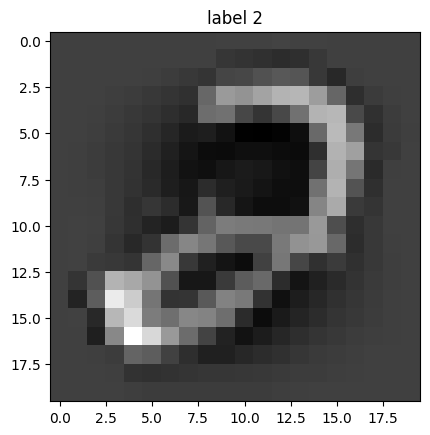

In [16]:
# tester une image
c= 3
print (y_pred[c])
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Méthode 2: Arbres de décision


In [17]:
# Créer le modèle
model = DecisionTreeClassifier()
# Entrainer le modèle
model = model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)
# calcul des metriques 
matrice_confusion = Matrice_confusion(Ytt, y_pred)  
accuracy = Accuracy(Ytt, y_pred)  

# Affichage
print("SVM:")
print("Confusion Matrix:")
print(matrice_confusion)
print(f"Accuracy: {accuracy:.4f}")
print("- Recall of each class: ")
recall = AV_Recall(Ytt, y_pred)
print(f"Recall: {recall:.4f}")
print("- Precision of each class: ")
precision = AV_Precision(Ytt, y_pred)
print(f"Precision: {precision:.4f}")
print("- False Positive Rate of each class: ")
false_positive_rate = AV_FPR(Ytt, y_pred)
print(f"False positive rate: {false_positive_rate:.4f}")
print("- True Negative Rate of each class: ")
true_negative_rate = AV_TNR(Ytt, y_pred)
print(f"True negative rate: {true_negative_rate:.4f}")

SVM:
Confusion Matrix:
[[133   2   4   2   0   0   5   5   1   0]
 [  3 101   5   9   5   4   6  16   3   3]
 [  4  10  96   1  19   5   4   5   8   2]
 [  3   3   0 109   3   1   7   5  11   1]
 [  2   3  15   2 100   2   3   5   4   5]
 [  0   2   3   2   6 116   0   6   3   5]
 [  3   4   5   3   0   0 128   4   9   2]
 [  0  14   4   4   9   4   1  92   2   2]
 [  1   4   4   8   3   0  17   9 111   1]
 [  1   2   4   1   1   2   1   0   0 152]]
Accuracy: 0.7587
- Recall of each class: 
   Recall of class 1= 0.8750
   Recall of class 2= 0.6516
   Recall of class 3= 0.6234
   Recall of class 4= 0.7622
   Recall of class 5= 0.7092
   Recall of class 6= 0.8112
   Recall of class 7= 0.8101
   Recall of class 8= 0.6970
   Recall of class 9= 0.7025
   Recall of class 10= 0.9268
Recall: 0.7569
- Precision of each class: 
   precision of class 1= 0.8867
   precision of class 2= 0.6966
   precision of class 3= 0.6857
   precision of class 4= 0.7730
   precision of class 5= 0.6849
   precisi

2


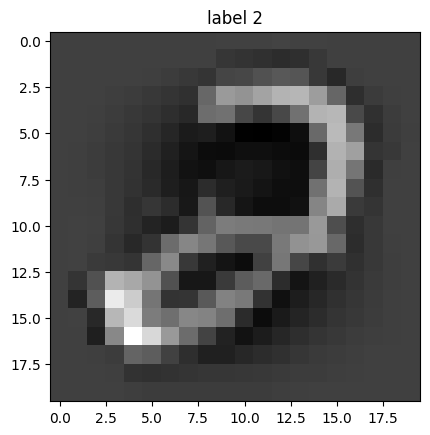

In [18]:
# tester une image
c= 3
print (y_pred[c])
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Méthode 3: RN 
Réseaux de neurones Perceptron

In [19]:
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)
model.fit(Xt, Yt)

y_pred = model.predict(Xtt)
# calcul des metriques 
matrice_confusion = Matrice_confusion(Ytt, y_pred)  
accuracy = Accuracy(Ytt, y_pred)  

# Affichage
print("SVM:")
print("Confusion Matrix:")
print(matrice_confusion)
print(f"Accuracy: {accuracy:.4f}")
print("- Recall of each class: ")
recall = AV_Recall(Ytt, y_pred)
print(f"Recall: {recall:.4f}")
print("- Precision of each class: ")
precision = AV_Precision(Ytt, y_pred)
print(f"Precision: {precision:.4f}")
print("- False Positive Rate of each class: ")
false_positive_rate = AV_FPR(Ytt, y_pred)
print(f"False positive rate: {false_positive_rate:.4f}")
print("- True Negative Rate of each class: ")
true_negative_rate = AV_TNR(Ytt, y_pred)
print(f"True negative rate: {true_negative_rate:.4f}")

SVM:
Confusion Matrix:
[[339   3   0   3   2   0   0   4   0   0]
 [  3 300   9   9   1   7   5  12   1   7]
 [  4  13 297   2  16   2   6   8   9   1]
 [  1   3   0 302   2   4   1   2  20   3]
 [  1   6  11  14 296   3   1  12   5   2]
 [  0   4   0   1   6 324   0   1   0   7]
 [  8   7   2  11   0   0 306   1  13   2]
 [  5   9   8   6  13   0   1 296   8   4]
 [  5   1   7  10   4   2  14   2 299   7]
 [  0   2   1   1   6   5   1   0   0 338]]
Accuracy: 0.8849
- Recall of each class: 
   Recall of class 1= 0.9658
   Recall of class 2= 0.8475
   Recall of class 3= 0.8296
   Recall of class 4= 0.8935
   Recall of class 5= 0.8433
   Recall of class 6= 0.9446
   Recall of class 7= 0.8743
   Recall of class 8= 0.8457
   Recall of class 9= 0.8519
   Recall of class 10= 0.9548
Recall: 0.8851
- Precision of each class: 
   precision of class 1= 0.9262
   precision of class 2= 0.8621
   precision of class 3= 0.8866
   precision of class 4= 0.8412
   precision of class 5= 0.8555
   precisi

In [20]:
# Choisir un image de test 
c=1

In [21]:
model.predict([Xtt[c,:]])

array([7])

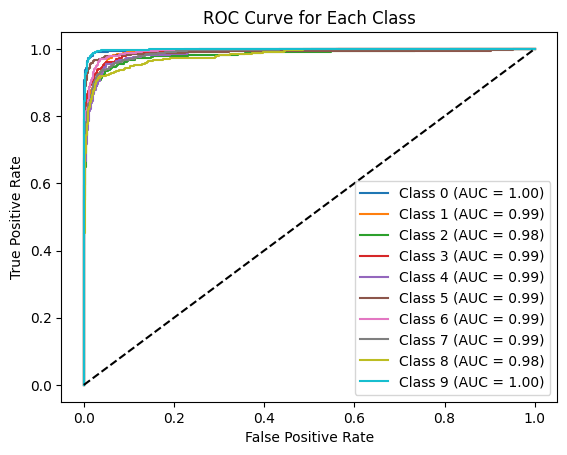

In [907]:
from sklearn.preprocessing import label_binarize

y_proba = model.predict_proba(Xtt)
num_classes = len(np.unique(Y))
Ytt_bin = label_binarize(Ytt, classes=np.unique(Y))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(Ytt_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend()
plt.show()

Afficher l'image testée

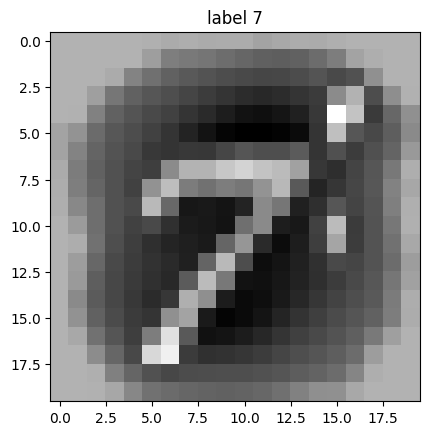

In [22]:
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Appliquer les métriques implementées pour voir le résultat et comparer les avec celles des librairies de python

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve
from sklearn.preprocessing import label_binarize


matrice_sklearn = confusion_matrix(Ytt, y_pred)
accuracy_sklearn = accuracy_score(Ytt, y_pred)
recall_sklearn = recall_score(Ytt, y_pred, average="macro")  # "macro" : moyenne sur toutes les classes
precision_sklearn = precision_score(Ytt, y_pred, average="macro")


# Affichage des résultats
print("Comparaison des résultats")
print(f"Matrice de confusion (Ma version) :\n{matrice_confusion}")
print(f"Matrice de confusion (sklearn) :\n{matrice_sklearn}")

print(f"Accuracy (Ma version) : {accuracy:.4f}")
print(f"Accuracy (sklearn) : {accuracy_sklearn:.4f}")

print(f"Recall (Ma version) : {recall:.4f}")
print(f"Recall (sklearn) : {recall_sklearn:.4f}")

print(f"Precision (Ma version) : {precision:.4f}")
print(f"Precision (sklearn) : {precision_sklearn:.4f}")




Comparaison des résultats
Matrice de confusion (Ma version) :
[[339   3   0   3   2   0   0   4   0   0]
 [  3 300   9   9   1   7   5  12   1   7]
 [  4  13 297   2  16   2   6   8   9   1]
 [  1   3   0 302   2   4   1   2  20   3]
 [  1   6  11  14 296   3   1  12   5   2]
 [  0   4   0   1   6 324   0   1   0   7]
 [  8   7   2  11   0   0 306   1  13   2]
 [  5   9   8   6  13   0   1 296   8   4]
 [  5   1   7  10   4   2  14   2 299   7]
 [  0   2   1   1   6   5   1   0   0 338]]
Matrice de confusion (sklearn) :
[[339   3   0   3   2   0   0   4   0   0]
 [  3 300   9   9   1   7   5  12   1   7]
 [  4  13 297   2  16   2   6   8   9   1]
 [  1   3   0 302   2   4   1   2  20   3]
 [  1   6  11  14 296   3   1  12   5   2]
 [  0   4   0   1   6 324   0   1   0   7]
 [  8   7   2  11   0   0 306   1  13   2]
 [  5   9   8   6  13   0   1 296   8   4]
 [  5   1   7  10   4   2  14   2 299   7]
 [  0   2   1   1   6   5   1   0   0 338]]
Accuracy (Ma version) : 0.8849
Accuracy (sk

# Refaire le processus sur un autre dataset de votre choix (exemple: iris...)

# Split data

In [24]:
from sklearn.datasets import load_iris

iris = load_iris()
X_iris, y_iris = iris.data, iris.target
Xt_iris, Xtt_iris, Yt_iris, Ytt_iris = train_test_split(X_iris, y_iris, test_size=0.3)

# Print the sizes of the splits
print(f"Training set size: {Xt_iris.shape[0]} samples")
print(f"Test set size: {Xtt_iris.shape[0]} samples")


Training set size: 105 samples
Test set size: 45 samples


# Normalize Data

In [25]:
from sklearn.preprocessing import StandardScaler

scaler_iris = StandardScaler()
scaler_iris.fit(Xt_iris)
Xt_iris_scaled = scaler_iris.transform(Xt_iris)
Xtt_iris_scaled = scaler_iris.transform(Xtt_iris)

# KNN

In [33]:
k = 3
y_pred = KNN(Xt_iris, Yt_iris, Xtt_iris, k)

# Calcul des métriques (ma version)
mat_conf = Matrice_confusion(Ytt_iris, y_pred)
acc = Accuracy(Ytt_iris, y_pred)

recall = recall_score(Ytt, y_pred_sklearn, average='macro')
precision = precision_score(Ytt, y_pred_sklearn, average='macro')

# Affichage des résultats
print(f"Matrice de confusion :\n{mat_conf}")
print(f"Accuracy : {acc:.4f}")
print(f"Recall  : {recall:.4f}")
print(f"Precision : {precision:.4f}")

Matrice de confusion :
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Accuracy : 0.9778
Recall  : 0.8675
Precision : 0.8716


# MSV


In [36]:
#MVS
#Créer le modèle
model= svm.SVC(kernel='linear') 
# entrainement 
model.fit(Xt_iris, Yt_iris)
# Prediction
y_pred = model.predict(Xtt_iris)
# calcul des metriques 
matrice_confusion = Matrice_confusion(Ytt_iris, y_pred)  

accuracy = Accuracy(Ytt_iris, y_pred)  

# Affichage
print("SVM:")
print("Confusion Matrix:")
print(matrice_confusion)
print(f"Accuracy: {accuracy:.4f}")
print("- Recall of each class: ")
recall = AV_Recall(Ytt_iris, y_pred)
print(f"Recall: {recall},4f")
print("- Precision of each class: ")
precision = AV_Precision(Ytt_iris, y_pred)
print(f"Precision: {precision:.4f}")
print("- False Positive Rate of each class: ")
false_positive_rate = AV_FPR(Ytt_iris, y_pred)
print(f"False positive rate: {false_positive_rate:.4f}")
print("- True Negative Rate of each class: ")
true_negative_rate = AV_TNR(Ytt_iris, y_pred)
print(f"True negative rate: {true_negative_rate:.4f}")

SVM:
Confusion Matrix:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Accuracy: 0.9778
- Recall of each class: 
   Recall of class 0= 1.0000
   Recall of class 1= 0.9444
   Recall of class 2= 1.0000
Recall: 0.9814814814814815,4f
- Precision of each class: 
   precision of class 0= 1.0000
   precision of class 1= 1.0000
   precision of class 2= 0.9167
Precision: 0.9722
- False Positive Rate of each class: 
   The false positive rate of class 0= 0.0000
   The false positive rate of class 1= 0.0000
   The false positive rate of class 2= 0.0294
False positive rate: 0.0098
- True Negative Rate of each class: 
   True negative rate of class 0= 1.0000
   True negative rate of class 1= 1.0000
   True negative rate of class 2= 0.9706
True negative rate: 0.9902


# Decision Tree

In [27]:
# Créer le modèle
model = DecisionTreeClassifier()
# Entrainer le modèle
model = model.fit(Xt_iris, Yt_iris)
# Prediction
y_pred = model.predict(Xtt_iris)
# calcul des metriques 
matrice_confusion = Matrice_confusion(Ytt_iris, y_pred)  
accuracy = Accuracy(Ytt_iris, y_pred)  

# Affichage
print("SVM:")
print("Confusion Matrix:")
print(matrice_confusion)
print(f"Accuracy: {accuracy:.4f}")
print("- Recall of each class: ")
recall = AV_Recall(Ytt_iris, y_pred)
print(f"Recall: {recall:.4f}")
print("- Precision of each class: ")
precision = AV_Precision(Ytt_iris, y_pred)
print(f"Precision: {precision:.4f}")
print("- False Positive Rate of each class: ")
false_positive_rate = AV_FPR(Ytt_iris, y_pred)
print(f"False positive rate: {false_positive_rate:.4f}")
print("- True Negative Rate of each class: ")
true_negative_rate = AV_TNR(Ytt_iris, y_pred)
print(f"True negative rate: {true_negative_rate:.4f}")

SVM:
Confusion Matrix:
[[16  0  0]
 [ 0 12  2]
 [ 0  1 14]]
Accuracy: 0.9333
- Recall of each class: 
   Recall of class 0= 1.0000
   Recall of class 1= 0.8571
   Recall of class 2= 0.9333
Recall: 0.9302
- Precision of each class: 
   precision of class 0= 1.0000
   precision of class 1= 0.9231
   precision of class 2= 0.8750
Precision: 0.9327
- False Positive Rate of each class: 
   The false positive rate of class 0= 0.0000
   The false positive rate of class 1= 0.0323
   The false positive rate of class 2= 0.0667
False positive rate: 0.0330
- True Negative Rate of each class: 
   True negative rate of class 0= 1.0000
   True negative rate of class 1= 0.9677
   True negative rate of class 2= 0.9333
True negative rate: 0.9670


# RN

In [28]:
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
Xt_iris, Xtt_iris, Yt_iris, Ytt_iris = train_test_split(X_iris, y_iris,random_state=0 ,test_size=0.3)

model.fit(Xt_iris, Yt_iris)

y_pred = model.predict(Xtt_iris)
# calcul des metriques 
matrice_confusion = Matrice_confusion(Ytt_iris, y_pred)  
accuracy = Accuracy(Ytt_iris, y_pred)  

# Affichage
print("SVM:")
print("Confusion Matrix:")
print(matrice_confusion)
print(f"Accuracy: {accuracy:.4f}")
print("- Recall of each class: ")
recall = AV_Recall(Ytt_iris, y_pred)
print(f"Recall: {recall:.4f}")
print("- Precision of each class: ")
precision = AV_Precision(Ytt_iris, y_pred)
print(f"Precision: {precision:.4f}")
print("- False Positive Rate of each class: ")
false_positive_rate = AV_FPR(Ytt_iris, y_pred)
print(f"False positive rate: {false_positive_rate:.4f}")
print("- True Negative Rate of each class: ")
true_negative_rate = AV_TNR(Ytt_iris, y_pred)
print(f"True negative rate: {true_negative_rate:.4f}")

SVM:
Confusion Matrix:
[[16  0  0]
 [ 0 16  2]
 [ 0  0 11]]
Accuracy: 0.9556
- Recall of each class: 
   Recall of class 0= 1.0000
   Recall of class 1= 0.8889
   Recall of class 2= 1.0000
Recall: 0.9630
- Precision of each class: 
   precision of class 0= 1.0000
   precision of class 1= 1.0000
   precision of class 2= 0.8462
Precision: 0.9487
- False Positive Rate of each class: 
   The false positive rate of class 0= 0.0000
   The false positive rate of class 1= 0.0000
   The false positive rate of class 2= 0.0588
False positive rate: 0.0196
- True Negative Rate of each class: 
   True negative rate of class 0= 1.0000
   True negative rate of class 1= 1.0000
   True negative rate of class 2= 0.9412
True negative rate: 0.9804


# ROC curve for RN model:

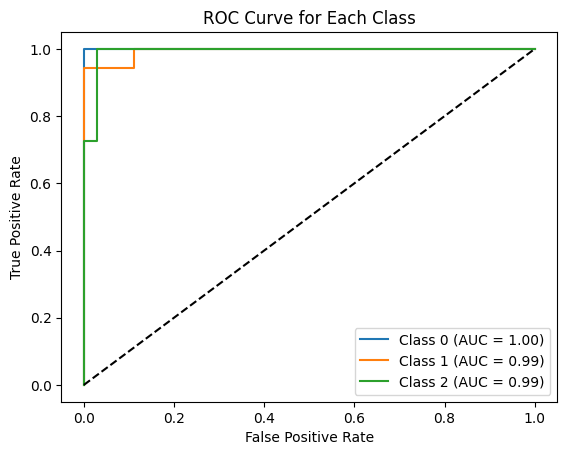

In [29]:
from sklearn.preprocessing import label_binarize

y_proba = model.predict_proba(Xtt_iris)
num_classes = len(np.unique(y_iris))
Ytt_bin = label_binarize(Ytt_iris, classes=np.unique(y_iris))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(Ytt_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend()
plt.show()